Các bạn hẳn thấy hình vẽ dưới đây quen thuộc:

<div class="imgcap">
 <img src ="https://github.com/tiepvupsu/tiepvupsu.github.io/blob/master/assets/GD/gradient_descent.png?raw=true" align = "center" width = "600">
</div>

Điểm màu xanh lục là điểm local minimum (cực tiểu), và cũng là điểm _global minimum_, của hàm số \\(f(x) = \frac{1}{2}(x-1)^2 - 2\\). Từ đây trở đi, tôi sẽ dùng _local minimum_ để thay cho _điểm cực tiểu_, _global minimum_ để thay cho _điểm mà tại đó hàm số đạt giá trị nhỏ nhất_. 

Giả sử chúng ta đang quan tâm đến một hàm số một biến có đạo hàm mọi nơi. Xin cho tôi được nhắc lại vài điều đã quá quen thuộc:

1. Điểm cực tiểu \\(x^\*\\) của hàm số là điểm có đạo hàm \\(f'(x(t))\\) bằng 0. Hơn thế nữa, trong lân cận của nó, đạo hàm của các điểm phía bên trái \\(x^*\\) là không dương, đạo hàm của các điểm phía bên phải \\(x^*\\) là không âm.
2. Đường tiếp tuyến với đồ thị hàm số đó tại 1 điểm bất kỳ có hệ số góc chính bằng đạo hàm của hàm số tại điểm đó. 

Trong hình phía trên, các điểm bên trái của điểm cực tiểu màu xanh lục có đạo hàm âm, các điểm bên phải có đạo hàm âm. Và đối với hàm số này, càng xa về phía trái của điểm cực tiểu thì đạo hàm càng âm, càng xa về phía phải thì đạo hàm càng âm. 

### Gradient Descent
Trong Machine Learning nói riêng và Toán Tối Ưu nói chung, chúng ta thường xuyên phải tìm giá trị nhỏ nhất (hoặc đôi khi là lớn nhất) của một hàm số nào đó. Ví dụ như các hàm mất mát trong hai bài [Linear Regression](/2016/12/28/linearregression/) và [K-means Clustering](/2017/01/01/kmeans/). Nhìn chung, việc tìm giá trị nhỏ nhất (global minimum) của hàm số là không khả thi trong các bài toán này. Thay vào đó, người ta thường cố gắng tìm các điểm cực tiểu (local minimum), và ở một mức độ nào đó, coi đó là nghiệm cần tìm của bài toán. Các điểm cực tiểu là nghiệm của phương trình đạo hàm bằng 0. Nếu bằng một cách nào đó có thể tìm được toàn bộ (hữu hạn) các điểm cực tiểu, ta chỉ cần thay từng điểm cực tiểu đó vào hàm số rồi tìm điểm làm cho hàm có giá trị nhỏ nhất (_đoạn này nghe rất quen thuộc, đúng không?_). Tuy nhiên, trong hầu hết các trường hợp, việc giải phương trình đạo hàm bằng 0 trong thực tế vẫn là bất khả thi. Nguyên nhân có thể đến từ sự phức tạp của dạng của đạo hàm, từ việc các điểm dữ liệu có số chiều lớn, hoặc từ việc có quá nhiều điểm dữ liệu. 

Hướng tiếp cận phổ biến nhất là xuất phát từ một điểm mà chúng ta coi là _gần_ với nghiệm của bài toán, sau đó dùng một phép toán lặp để tiến dần đến điểm cần tìm, tức đến khi đạo hàm gần với 0. (Đây cũng chính là lý do phương pháp này được gọi là Gradient Descent - tức giảm đạo hàm). Gradient Descent (viết gọn là GD) và các biến thể của nó là một phương pháp được dùng nhiều nhất. 

## Gradient Descent cho hàm 1 biến
Quay trở lại hình vẽ ban đầu và một vài quan sát tôi đã nêu. Giả sử  \\(x^\*\\) là điểm global minimum màu xanh lục, \\(x(t)\\) là điểm ta tìm được sau vòng lặp thứ \\(t\\). Ta cần tìm một thuật toán để đưa \\(x(t)\\) về càng gần \\(x^\*\\) càng tốt. 

Chúng ta lại có thêm hai quan sát nữa:

1. Nếu đạo hàm của hàm số tại \\(x(t)\\): \\(f'(x(t)) > 0\\) thì \\(x(t)\\) nằm về bên phải so với \\(x^*\\) (và ngược lại). Để điểm tiếp theo \\(x(t+1)\\) gần với \\(x^\*\\) hơn, chúng ta cần di chuyển \\(x(t)\\) về phía bên trái, tức về phía _âm_. Nói các khác, __chúng ta cần di chuyển ngược dấu với đạo hàm__:
\\[
x(t+1) = x(t) + \delta
\\]
Trong đó \\(\delta\\) ngược dấu với đạo hàm.

2. \\(f'(x(t))\\) càng lớn hơn 0 thì \\(x(t)\\) càng xa \\(x^*\\) về phía bên phải (và ngược lại). Vậy, lượng di chuyển \delta, một cách trực quan nhất, là tỉ lệ thuận với \\(-f'(x(t))\\). 

Hai nhận xét phía trên cho chúng ta một các cập nhật đơn giản là:
\\[
x(t+1) = x(t) - \eta f'(x(t))
\\]

Trong đó \\(\eta\\) (đọc là _eta_) là một số dương được gọi là _learning rate_ (tốc độ học). Dấu trừ thể hiện việc chúng ta phải đi ngược với đạo hàm. 

### Ví dụ đơn giản với Python

Xét hàm số \\(f(x) = x^2 + 5\sin(x)\\) với đạo hàm \\(f'(x) = 2x + 5\cos(x)\\) (tôi chọn hàm này vì nó không dễ tìm nghiệm của đạo hàm bằng 0 như hàm phía trên). Giả sử bắt đầu từ một điểm \\(x(0)\\) nào đó, tại vòng lặp thứ \\(t\\), chúng ta sẽ cập nhật như sau:
\\[
x(t+1) = x(t) - \eta(2x + 5\cos(x))
\\]

Như thường lệ, tôi khai báo vài thư viện quen thuộc

In [46]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt

Tiếp theo, tôi viết các hàm số :

1. `grad` để tính đạo hàm
2. `cost` để tính giá trị của hàm số. Hàm này không sử dụng trong thuật toán nhưng thường được dùng để kiểm tra việc tính đạo hàm của đúng không hoặc để xem giá trị của hàm số có giảm theo mỗi vòng lặp hay không.
3. `myGD1` là phần chính thực hiện thuật toán Gradient Desent nêu phía trên. Thuật toán dừng lại khi đạo hàm đủ nhỏ.

In [2]:
def grad(x):
    return 2*x+ 5*np.cos(x)

def cost(x):
    return x**2 + 5*np.sin(x)

def myGD1(eta, x0):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return (x, it)

Sau khi có các hàm cần thiết, tôi thử tìm nghiệm với các điểm ban đầu khác nhau là \\(x(0) = -5\\) và \\(x(0) = 5\\).

In [75]:
(x1, it1) = myGD1(.1, -5)
(x2, it2) = myGD1(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110667, cost = -3.246394, obtained after 11 iterations
Solution x2 = -1.110341, cost = -3.246394, obtained after 29 iterations


Vậy là với các điểm ban đầu khác nhau, thuật toán của chúng ta tìm được nghiệm giống nhau, mặc dù với tốc độ hội tụ khác nhau. Dưới đây là hình ảnh minh họa thuật toán GD cho bài toán này.


<table width = "100%" style = "border: 0px solid white">
   <tr >
        <td width="50%" style = "border: 0px solid white"> 
            <img src = "/assets/GD/1dimg_5_0.1_-5.gif">
        </td>
        <td width="50%" style = "border: 0px solid white">
            <img src = "/assets/GD/1dimg_5_0.1_5.gif">
        </td>
    </tr>
</table> 

Từ hình minh họa trên ta thấy rằng bên trái hội tụ nhanh hơn (\\(x(0) = -5\\) vì nó gần với nghiệm hơn. Hơn nữa, khi (\\(x(0) = -5 \\), _đường đi_ của nó phải đi qua một điểm có hoành độ gần bằng 2, điểm này có đạo hàm khá nhỏ (nhưng khác 0), khiến cho thuật toán _la cà_ ở đây khá lâu. Khi vượt qua được điểm này thì mọi việc diễn ra rất tốt đẹp. 

Tốc độ hội tụ của GD không những phụ thuộc vào điểm khởi tạo ban đầu mà còn phụ thuộc vào _learning rate_. Dưới đây là một ví dụ với cùng điểm khởi tạo \\(x(0) = -5\\) nhưng tốc độ học khác nhau:

Ta quan sát thấy hai điều:

1. Với _learning rate_ nhỏ \\(x(0) = 0.01\\), tốc độ hội tụ rất chậm. Trong ví dụ này tôi chọn tối đa 100 vòng lặp nên thuật toán dừng lại trước khi tới _đích_, mặc dù đã rất gần. Trong thực tế, khi việc tính toán trở nên phức tạp, _learning rate_ quá thấp sẽ ảnh hưởng tới tốc độ của thuật toán rất nhiều, thậm chí không bao giờ tới được đích. 
2. Với _learning rate_ lớn \\(x(0) = 0.5\\), thuật toán tiến rất nhanh tới _gần đích_. Tuy nhiên, thuật toán không hội tụ được vì _bước nhảy_ quá lớn, khiến nó cứ _quẩn quanh_ ở đích. 

Việc lựa chọn _learning rate_ rất quan trọng trong các bài toán thực tế. Việc lựa chọn giá trị này phụ thuộc nhiều vào từng bài toán và phải làm một vài thí nghiệm để chọn ra giá trị tốt nhất. Ngoài ra, có một vài phương pháp lựa chọn _learning rate_, hoặc _learning rate_ khác nhau sau mỗi vòng lặp. Tôi sẽ quay lại vấn đề này ở phần sau. 

## Gradient Descent cho hàm nhiều biến
Giả sử ta cần tìm global minimum cho hàm \\(f(\mathbf{\theta}\\) trong đó \\(\mathbf{\theta}\\) (_theta_) là một vector, thường được dùng để ký hiệu tập hợp các tham số của một mô hình cần tối ưu. Đạo hàm (gradient) của hàm số đó tại một điểm \\(\theta\\) bất kỳ được ký hiệu là \\(\nabla_{\theta}f(\theta)\\) (hình tam giác ngược đọc là _nabla_). Tương tự như hàm 1 biến, thuật toán GD cho hàm nhiều biến cũng bắt đầu bằng một điểm dự đoán \\(\theta(0)\\), sau đó, ở vòng lặp thứ \\(t\\), quy tắc cập nhật là:

\\[
\theta(t+1) = \theta(t) - \eta \nabla_{\theta} f(\theta(t))
\\]

Hoặc viết dưới dạng đơn giản hơn: \\(\theta = \theta - \eta \nabla_{\theta} f(\theta)\\)

### Quay lại với bài toán Linear Regression
Trong mục này, chúng ta quay lại với bài toán [Linear Regression](/2016/12/28/linearregression/) và thử tối ưu hàm mất mát của nó bằng thuật toán GD. 

Hàm mất mát của Linear Regression là: 
\\[
\mathcal{L}(\mathbf{w}) = \frac{1}{2N}\|\|\mathbf{y - \bar{X}w}\|\|_2^2
\\]

**Chú ý**: hàm này có khác một chút so với hàm tôi nêu trong bài [Linear Regression](/2016/12/28/linearregression/). Mẫu số có thêm \\(N\\), tức lấy trung bình cộng, để tránh trường hợp hàm mất mát và đạo hàm có giá trị là một số rất lớn, ảnh hưởng tới khả năng tính toán. Về mặt toán học, nghiệm của hai bài toán là như nhau.

Đạo hàm của hàm mất mát là:
\\[
\nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = 
\frac{1}{N}\mathbf{\bar{X}}^T \mathbf{(\bar{X}w - y)}
\\]

### Sau đây là ví dụ trên Python và một vài lưu ý khi lập trình

1. Load thư viện

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(2)

Tiếp theo, chúng ta tạo dữ liệu 1000 điểm dữ liệu được chọn _gần_ với đường thẳng \\(y = 4 + 3x\\), hiển thị chúng và tìm nghiệm theo công thức:

Solution found by formula: w =  [[ 4.00305242  2.99862665]]


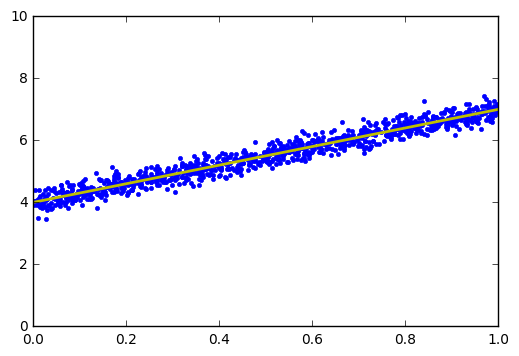

In [10]:
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1)

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w_lr.T)

w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)               # the fitting line
plt.axis([0, 1, 0, 10])
# plt.xlabel('(cm)')
# plt.ylabel('Weight (kg)')
plt.show()

Đường thẳng tìm được là đường có màu vàng có phương trình \\(y \approx 4 + 2.998x\\).

Tiếp theo ta viết đạo hàm và hàm mất mát:

In [18]:
def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;

def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

#### Kiểm tra đạo hàm
Việc tính đạo hàm có hàm nhiều biến thông thường khá phức tạp, nếu chúng ta tính sai đạo hàm thì thuật toán GD không thể chạy đúng được. Trong thực nghiệm, có một cách để kiểm tra liệu đạo hàm tính được có chính xác không. Cách này dựa trên định nghĩa của đạo hàm (cho hàm 1 biến):
\\[
f'(x) = \lim_{\epsilon \rightarrow 0}\frac{f(x + \epsilon) - f(x)}{\epsilon}
\\]

Một cách thường được sử dụng là lấy một giá trị \\(\epsilon \\) rất nhỏ, ví dụ \\(10^{-6}\\), và sử dụng công thức:
\\[
f'(x) \approx \frac{f(x + \epsilon) - f(x - \epsilon)}{2\epsilon} ~~~~ (1)
\\]

Cách tính này được gọi là _numerical gradient_.

Với hàm nhiều biến, công thức \\((1)\\) được áp dụng cho từng biến khi các biến khác cố định. Cách tính này thường cho giá trị khá chính xác. Tuy nhiên, cách này không được sử dụng để tính đạo hàm vì độ phức tạp quá cao so với cách tính trực tiếp. Khi so sánh đạo hàm này với đạo hàm chính xác tính theo công thức, người ta thường giảm số chiều dữ liệu và giảm số điểm dữ liệu để thuận tiện cho tính toán. Một khi đạo hàm tính được rất gần với _numerical gradient_, chúng ta có thể tự tin là đạo hàm tính được là chính xác.

Dưới đây là một đoạn code đơn giản để kiểm tra đạo hàm và có thể áp dụng với một hàm số (của một vector) bất kỳ với `cost` và `grad` đã tính ở phía trên. 

In [20]:
def numerical_grad(w, cost):
	eps = 1e-4
	g = np.zeros_like(w)
	for i in range(len(w)):
		w_p = w.copy()
		w_n = w.copy()
		w_p[i] += eps 
		w_n[i] -= eps
		g[i] = (cost(w_p) - cost(w_n))/(2*eps)
	return g 

def check_grad(w, cost, grad):
	w = np.random.rand(w.shape[0], w.shape[1])
	grad1 = grad(w)
	grad2 = numerical_grad(w, cost)
	return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 


print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))

Checking gradient... True


Với bài toán Linear Regression, cách tính đạo hàm phía trên được coi là đúng vì sai số giữa hai cách tính nhỏ (nhỏ hơn \\(10^{-6}\\)). Sau khi có được đạo hàm chính xác, chúng ta viết hàm cho GD:

In [35]:
def myGD(w_init, grad, eta):
	w = [w_init]
	for it in range(100):
		w_new = w[-1] - eta*grad(w[-1])
		if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
			break 
		w.append(w_new)
		# print('iter %d: ' % it, w[-1].T)
	return (w, it) 

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations', it1+1)

Solution found by GD: w =  [[ 4.01780793  2.97133693]] ,
after %d iterations 49


Sau 49 vòng lặp, thuật toán đã hội tụ với một nghiệm khá gần với nghiệm tìm được theo công thức. 

Dưới đây là hình động minh họa thuật toán GD.



<table width = "100%" style = "border: 0px solid white">
   <tr >
        <td width="40%" style = "border: 0px solid white"> 
        <img src = "/assets/GD/img1_1.gif">
         </td>
        <td width="40%" style = "border: 0px solid white">
        <img src = "/assets/GD/img2_1.gif">
        </td>
    </tr>
</table> 

Trong hình bên trái, các đường thẳng màu đỏ là nghiệm tìm được sau mỗi vòng lặp. 

Trong hình bên phải, tôi xin giới thiệu một thuật ngữ mới:
#### Đường đồng mức (level sets)
Độ thị của một hàm số với hai biến đầu vào cần được vẽ trong không gian ba chiều, nhều khi không giúp chúng ta nhìn rõ được nghiệm có khoảng tọa độ bao nhiêu. Trong toán tối ưu, người ta thường dùng một cách vẽ hình chiếu sử dụng khái niệm _đường đồng mức_ (level sets). 

Nếu các bạn để ý trong các bản độ tự nhiên, để miêu tả độ cao của các dãy núi, người ta dùng nhiều đường con kín bao quanh nhau như sau:

<div class="imgcap">
 <img src ="http://files.vforum.vn/2016/T06/img/vforum.vn-324944-hinh-44-lc6b0e1bba3c-c491e1bb93-c491e1bb8ba-hc3acnh-te1bb89-le1bb87-le1bb9bn.png" align = "center" width = "600">
 <div class = "thecap"> Ví dụ về đường đồng mức trong các bản đồ tự nhiên. 
</div>


Các vòng nhỏ màu đỏ hơn thể hiện các điểm ở trên cao hơn. 

Trong toán tối ưu, người ta cũng dùng phương pháp này để thể hiện các đồ thị trong không gian ba chiều trong không gian hai chiều. 

Quay trở lại với hình minh họa thuật toán GD cho bài toán Liner Regression bên trên, hình bên phải là hình biểu diễn các level sets. Tức là tại các điểm trên cùng một vòng, hàm mất mát có giá trị như nhau. Trong ví dụ này, tôi hiển thị giá trị của hàm số tại một số vòng. Các vòng màu xanh có giá trị thấp, các vòng tròn màu đỏ phía ngoài có giá trị cao hơn. Điểm này khác một chút so với đường đồng mức trong tự nhiên là các vòng bên trong thường thể hiện một thung lũng hơn là một đỉnh núi (vì chúng ta đang đi tìm giá trị nhỏ nhất).

Tôi thử với _learning rate_ nhỏ hơn, kết quả như sau:

<table width = "100%" style = "border: 0px solid white">
   <tr >
        <td width="40%" style = "border: 0px solid white"> 
        <img src = "/assets/GD/img1_0.1.gif">
         </td>
        <td width="40%" style = "border: 0px solid white">
        <img src = "/assets/GD/img2_0.1.gif">
        </td>
    </tr>
</table> 

Tốc độ hội tụ đã chậm đi nhiều, thậm chí sau 99 vòng lặp, GD vân chưa tìm được nghiệm tốt nhất. Trong các bài toán thực tế, chúng ta cần nhiều vòng lặp hơn nhiều, vì số chiều và số điểm dữ liệu là rất lớn.

## Một ví dụ khác

Để kết thúc phần 1 của Gradient Descent, tôi xin nêu thêm một ví dụ khác.

<div class="imgcap">
 <img src ="/assets/GD/img3_0.015.gif" align = "center" width = "800">
</div>

Hàm số \\(f(x, y) = (x^2 + y - 7)^2 + (x - y + 1)^2\\) có hai điểm local minimum tại \\((2, 3)\\) và \\(-3, -2)\\), và chúng cũng là hai điểm global minimum. Trong ví dụ này, tùy vào điểm khởi tạo mà chúng ta thu được các nghiệm cuối cùng khác nhau.

## Thảo luận

Dựa trên GD, có rất nhiều thuật toán phức tạp và hiệu quả hơn được thiết kế cho những loại bài toán khác nhau. Vì bài này đã đủ dài, tôi xin phép dừng lại ở đây. Mời các bạn đón đọc bài Gradient Descent phần 2 với nhiều kỹ thuật nâng cao hơn.

## Tài liệu tham khảo
1. [An overview of gradient descent optimization algorithms](http://sebastianruder.com/optimizing-gradient-descent/)
2. [http://www.benfrederickson.com/numerical-optimization/](An Interactive Tutorial on Numerical Optimization)
3. [Gradient Descent by Andrew NG](https://www.youtube.com/watch?v=eikJboPQDT0)